# 3- Signal Metrics Data Clean-up 

This file to be executed third

Haytham Mohamed - INFS890 Spring 2020

This notebook is to check missing data and outliers

In [466]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
from sklearn import preprocessing
from datetime import datetime
from scipy import stats

sns.set()
sns.set(color_codes=True)
#sns.set_color_codes()

pd.options.display.max_rows = 15
pd.options.display.float_format = '{:,.3f}'.format

# Read the raw data. 

All data is in one file, where each metric is listed under each other with three columns: 

1- metric: The name of the metric

2- date: the data and time of the metric

3- value: the metric value


In [467]:
# 1- read data file (from all runs 1 & 2)

home_dir = '/Users/hmohamed/github/data-research-spring2020'

file_dir = home_dir '/raw-data-linode-run3/merged/'  # this is prepared raw metrics signals
data_file = 'raw_timeseries_data.csv'

raw_df = pd.read_csv(file_dir + data_file)

raw_df.date = pd.to_datetime(raw_df.date)
raw_df.set_index('date', inplace=True)
raw_df.sort_index()

raw_df.head(2)

,service_cpu_use,service_memory_use,service_cpu_sat,service_net_usage,service_disk_usage,service_req_total,service_errors,service_request_size,service_response_size,containers_count,system_cpu_usage,service_ltcy_200,time
date,,,,,,,,,,,,,
2020-02-27 22:50:54,0.187,-0.196,-0.129,-0.015,0.984,0.013,0.658,-0.223,-0.308,-0.156,0.337,-0.233,"82,254.000"
2020-02-27 22:50:55,0.182,-0.069,0.018,0.028,2.057,0.013,0.658,-0.223,-0.308,-0.156,0.337,-0.233,"82,255.000"


In [468]:
raw_df.shape

(78780, 13)

# Metric on separate dataframe

Take away records with ltcy or number of pods null or equals to zero

In [469]:
raw_data = raw_df[raw_df['service_ltcy_200'].notna()]

raw_data.shape

(78780, 13)

In [470]:
unique_cont = raw_df['service_req_total'].unique()
unique_cont.shape

(5029,)

In [471]:
raw_data = raw_df[raw_df['containers_count'] > 0]

raw_data.head(10)

,service_cpu_use,service_memory_use,service_cpu_sat,service_net_usage,service_disk_usage,service_req_total,service_errors,service_request_size,service_response_size,containers_count,system_cpu_usage,service_ltcy_200,time
date,,,,,,,,,,,,,
2020-02-27 22:51:48,1.054,0.357,-0.489,-0.152,5.108,-0.983,-0.036,-0.275,-0.068,0.259,-0.070,-0.114,"82,308.000"
2020-02-27 22:51:49,0.804,0.379,-0.342,-0.221,6.340,-0.983,-0.036,-0.275,-0.068,0.259,-0.100,-0.114,"82,309.000"
2020-02-27 22:51:50,0.804,0.379,-0.215,-0.129,0.748,-0.983,-0.036,-0.275,-0.068,0.259,-0.100,-0.114,"82,310.000"
2020-02-27 22:51:51,0.898,0.357,-0.757,-0.134,-0.537,-0.983,-0.036,-0.275,-0.068,0.259,-0.100,-0.114,"82,311.000"
2020-02-27 22:51:52,0.428,0.546,-0.388,-0.134,-0.537,-0.983,-0.036,-0.275,-0.068,0.259,-0.100,-0.114,"82,312.000"
2020-02-27 22:51:53,0.355,0.362,0.265,-0.081,-0.511,-0.983,-0.036,-0.275,-0.068,0.259,-0.100,-0.114,"82,313.000"
2020-02-27 22:51:54,0.004,0.187,-0.528,-0.081,-0.772,-0.501,0.718,0.156,0.411,0.259,-0.100,0.336,"82,314.000"
2020-02-27 22:51:55,-0.008,-0.190,-0.573,-0.228,-0.834,-0.501,0.718,0.156,0.411,0.259,-0.100,0.336,"82,315.000"
2020-02-27 22:51:56,-0.218,-0.271,1.168,-0.199,0.131,-0.501,0.718,0.156,0.411,0.259,-0.041,0.336,"82,316.000"


# Examine the data

In [472]:
raw_data.describe(include="all")

,service_cpu_use,service_memory_use,service_cpu_sat,service_net_usage,service_disk_usage,service_req_total,service_errors,service_request_size,service_response_size,containers_count,system_cpu_usage,service_ltcy_200,time
count,"27,876.000","27,876.000","27,876.000","27,876.000","27,876.000","27,876.000","27,876.000","27,876.000","27,876.000","27,876.000","27,876.000","27,876.000","27,876.000"
mean,0.458,0.134,1.113,inf,134.740,inf,inf,0.096,0.195,inf,0.006,0.123,"42,316.819"
std,6.030,0.698,22.100,nan,822.383,nan,nan,0.418,2.567,nan,0.095,0.540,"26,020.992"
min,-0.997,-0.947,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,0.016,-0.363,-1.000,3.000
25%,-0.379,-0.287,-0.461,-0.272,-0.721,0.000,0.000,-0.080,-0.083,0.077,-0.039,-0.073,"14,291.750"
50%,-0.004,-0.012,0.027,0.014,0.015,0.007,0.000,0.004,0.004,0.138,0.001,0.012,"48,425.500"
75%,0.605,0.369,0.912,0.489,2.696,0.085,0.008,0.180,0.226,0.258,0.044,0.210,"63,869.250"
max,914.542,24.122,"3,582.987",inf,"15,499.590",inf,inf,8.271,104.672,inf,0.911,12.207,"86,387.000"


# Check missing values

In [473]:
# percent of missing value for every feature
raw_data.isnull().sum() * 100 / raw_data.shape[0]

service_cpu_use         0.000
service_memory_use      0.000
service_cpu_sat         0.000
service_net_usage       0.000
service_disk_usage      0.000
service_req_total       0.000
service_errors          0.000
service_request_size    0.000
service_response_size   0.000
containers_count        0.000
system_cpu_usage        0.000
service_ltcy_200        0.000
time                    0.000
dtype: float64

no missing values

In [474]:
if False:
    # because missing percentages are < 15%, we can go ahead and remedy them without checking more on the effect of missing
    # values 
    # we can use linear interpolation as immutation method to fill in missing values
    raw_data = raw_data.interpolate(method='linear', inplace=False)

    # TODO: visit again: 

    # I see one record with svc_req_rate has a null value
    # consider only rows with latency is not null
    raw_data = raw_data[raw_data['service_req_total'].notna()]

    # Note no more missing values
    raw_data.isnull().sum() * 100 / raw_data.shape[0]

In [475]:
if 1 == 0:
    cleaned_file_path = file_dir + 'no_missing_dataset.csv'
    raw_data.to_csv(path_or_buf=cleaned_file_path, index=False)

# Check Outliers

### latency target 

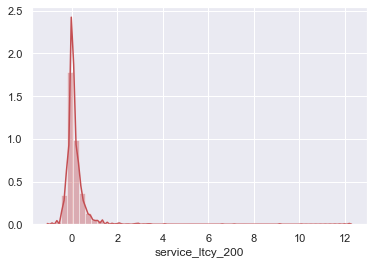

In [476]:
sns.distplot(raw_data['service_ltcy_200'], hist=True, rug=False, color="r", label='ltcy')

Minimum value of ltcy is 0.11, mean 1.092, 25% < 0.47, 50% < 0.68, 75% < 0.92 and the maximum jumps up to 10. Looks like values are around 1 where 75% of values are very close to one, and there are values have big jump to a 10. The outliers are aparent (as shown in the graph above as well).

There are two ways we can remedy outlier with. One way is to standarize the latency values and consider removing observations with values > (+/-) 4 (conventional rule for data sample > 200), or take out values fall less than 99 percentile. We will choose the first option.

In [477]:
# Create the Scaler object
scaler = preprocessing.StandardScaler()

if 1 == 0:
    raw_ltcy = raw_data['service_ltcy_200']

    # Fit your data on the scaler object
    scaled_ltcy = scaler.fit_transform(raw_ltcy.values.reshape(-1,1))
    scaled_ltcy = pd.DataFrame(scaled_ltcy, columns=['scaled_ltcy'])
    
    raw_data = pd.concat([raw_data, scaled_ltcy['scaled_ltcy'].abs()], axis=1)
    #raw_data['scaled_ltcy'] = scaled_ltcy['scaled_ltcy'].abs()
    
    raw_data = raw_data[raw_data['scaled_ltcy'] < 4]
    sns.distplot(raw_data['ltcy'])

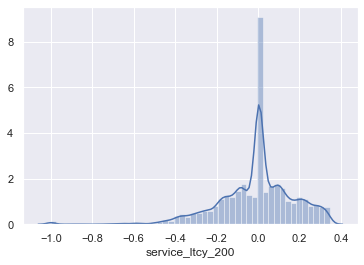

In [478]:
# option 2: consider lower 99 percentile of the ltcy values

if 1 == 1:
    q = raw_data['service_ltcy_200'].quantile(0.85)
    raw_data = raw_data[raw_data['service_ltcy_200'] < q]
    raw_data
    sns.distplot(raw_data['service_ltcy_200'])

The scaled latency distribution shows now an exponential graph. Taking the log and plotting it would remedy the skewness.

In [479]:
raw_data.shape

(23688, 13)

In [480]:
raw_data.describe()

,service_cpu_use,service_memory_use,service_cpu_sat,service_net_usage,service_disk_usage,service_req_total,service_errors,service_request_size,service_response_size,containers_count,system_cpu_usage,service_ltcy_200,time
count,"23,688.000","23,688.000","23,688.000","23,688.000","23,688.000","23,688.000","23,688.000","23,688.000","23,688.000","23,688.000","23,688.000","23,688.000","23,688.000"
mean,0.471,0.133,1.130,inf,137.694,inf,inf,0.054,0.081,inf,0.005,-0.006,"41,469.077"
std,6.511,0.706,23.930,nan,830.568,nan,nan,0.332,0.815,nan,0.088,0.182,"25,853.300"
min,-0.997,-0.947,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,0.016,-0.363,-1.000,3.000
25%,-0.377,-0.288,-0.463,-0.272,-0.719,0.000,0.000,-0.089,-0.106,0.077,-0.036,-0.094,"14,291.750"
50%,-0.005,-0.013,0.022,0.003,0.008,0.006,0.000,0.003,0.003,0.127,0.001,0.005,"45,776.500"
75%,0.605,0.367,0.886,0.431,2.554,0.036,0.002,0.132,0.163,0.231,0.040,0.101,"62,597.250"
max,914.542,24.122,"3,582.987",inf,"15,499.590",inf,inf,4.661,44.116,inf,0.622,0.347,"86,387.000"


### Number of Pods

Take away the outliers on pods as well. 

In [481]:
if 1 == 0:  # not using this , use the one below
    raw_svc_pods = raw_data['containers_count']

    # Fit your data on the scaler object
    scaled_svc_pods = scaler.fit_transform(raw_svc_pods.values.reshape(-1,1))
    scaled_svc_pods = pd.DataFrame(scaled_svc_pods, columns=['scaled_svc_pods'])

    raw_data['scaled_svc_pods'] = scaled_svc_pods['scaled_svc_pods'].abs()
    raw_data = raw_data[raw_data['scaled_svc_pods'] < 4]
    sns.distplot(raw_data['svc_pods'])

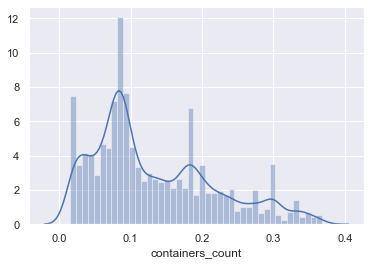

In [482]:
# I am using this opion 2: consider lower 99 percentile of the pods values
if 1 == 1:  
    q = raw_data['containers_count'].quantile(0.88)
    raw_data = raw_data[raw_data['containers_count'] < q]
    sns.distplot(raw_data['containers_count'])

In [483]:
raw_data.describe()

,service_cpu_use,service_memory_use,service_cpu_sat,service_net_usage,service_disk_usage,service_req_total,service_errors,service_request_size,service_response_size,containers_count,system_cpu_usage,service_ltcy_200,time
count,"20,832.000","20,832.000","20,832.000","20,832.000","20,832.000","20,832.000","20,832.000","20,832.000","20,832.000","20,832.000","20,832.000","20,832.000","20,832.000"
mean,0.474,0.133,1.162,inf,140.142,inf,inf,0.049,0.079,0.132,0.004,-0.007,"40,365.640"
std,6.915,0.710,25.492,nan,833.420,nan,nan,0.315,0.855,0.085,0.088,0.180,"25,980.095"
min,-0.997,-0.947,-1.000,-0.999,-1.000,-1.000,-1.000,-1.000,-1.000,0.016,-0.363,-1.000,3.000
25%,-0.374,-0.287,-0.457,-0.264,-0.708,0.000,0.000,-0.085,-0.107,0.071,-0.036,-0.094,"13,577.750"
50%,-0.006,-0.012,0.025,0.002,0.013,0.006,0.000,0.004,0.003,0.102,0.000,0.005,"42,383.500"
75%,0.598,0.367,0.888,0.404,2.465,0.030,0.000,0.126,0.158,0.185,0.040,0.099,"61,964.250"
max,914.542,24.122,"3,582.987",inf,"15,499.590",inf,inf,4.661,44.116,0.368,0.622,0.347,"86,387.000"


In [484]:
raw_data.shape

(20832, 13)

## svc_disk_use

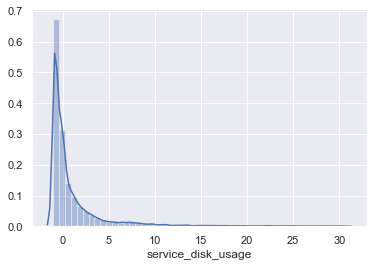

In [485]:
# I am using this opion 2: consider lower 99 percentile of the pods values
if 1 == 1:  
    q = raw_data['service_disk_usage'].quantile(0.90)
    raw_data = raw_data[raw_data['service_disk_usage'] < q]
    sns.distplot(raw_data['service_disk_usage'])   

In [486]:
raw_data.describe() 

,service_cpu_use,service_memory_use,service_cpu_sat,service_net_usage,service_disk_usage,service_req_total,service_errors,service_request_size,service_response_size,containers_count,system_cpu_usage,service_ltcy_200,time
count,"18,748.000","18,748.000","18,748.000","18,748.000","18,748.000","18,748.000","18,748.000","18,748.000","18,748.000","18,748.000","18,748.000","18,748.000","18,748.000"
mean,0.472,0.131,0.883,inf,1.231,inf,inf,0.047,0.079,0.131,0.004,-0.007,"39,740.542"
std,7.251,0.710,26.418,nan,4.052,nan,nan,0.305,0.890,0.085,0.088,0.180,"26,301.072"
min,-0.997,-0.947,-1.000,-0.999,-1.000,-1.000,-1.000,-1.000,-1.000,0.016,-0.363,-1.000,3.000
25%,-0.372,-0.288,-0.476,-0.261,-0.754,0.000,0.000,-0.081,-0.109,0.070,-0.036,-0.094,"12,872.750"
50%,-0.006,-0.012,-0.028,0.002,-0.131,0.006,0.000,0.004,0.003,0.100,0.000,0.005,"41,297.500"
75%,0.588,0.364,0.736,0.400,1.249,0.027,0.000,0.126,0.156,0.184,0.039,0.099,"62,027.250"
max,914.542,24.122,"3,582.987",inf,30.692,inf,inf,4.661,44.116,0.368,0.622,0.347,"86,387.000"


In [487]:
raw_data.shape

(18748, 13)

### svc_req_rate

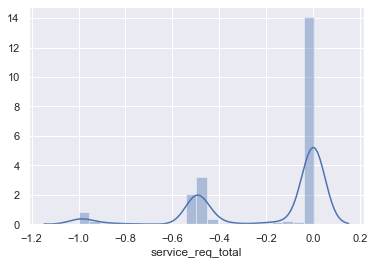

In [488]:
# I am using this opion 2: consider lower 99 percentile of the pods values
if 1 == 1:  
    q = raw_data['service_req_total'].quantile(0.50)
    raw_data = raw_data[raw_data['service_req_total'] < q]
    sns.distplot(raw_data['service_req_total'])  

In [489]:
raw_data.describe() 

,service_cpu_use,service_memory_use,service_cpu_sat,service_net_usage,service_disk_usage,service_req_total,service_errors,service_request_size,service_response_size,containers_count,system_cpu_usage,service_ltcy_200,time
count,"9,370.000","9,370.000","9,370.000","9,370.000","9,370.000","9,370.000","9,370.000","9,370.000","9,370.000","9,370.000","9,370.000","9,370.000","9,370.000"
mean,0.495,0.112,0.733,inf,1.183,-0.189,0.044,0.024,0.068,0.128,0.004,-0.037,"38,110.664"
std,10.047,0.614,4.233,nan,3.917,0.286,0.487,0.310,1.186,0.085,0.087,0.188,"26,632.275"
min,-0.972,-0.913,-1.000,-0.999,-1.000,-1.000,-1.000,-1.000,-1.000,0.016,-0.359,-1.000,9.000
25%,-0.366,-0.288,-0.466,-0.273,-0.749,-0.491,0.000,-0.096,-0.123,0.065,-0.036,-0.126,"12,004.250"
50%,-0.015,-0.018,-0.008,0.002,-0.135,0.000,0.000,0.001,0.000,0.100,0.001,0.000,"41,461.500"
75%,0.553,0.345,0.774,0.396,1.210,0.004,0.000,0.099,0.088,0.185,0.041,0.055,"63,275.750"
max,914.542,8.063,274.594,inf,30.692,0.006,5.508,4.661,44.116,0.368,0.615,0.346,"86,333.000"


In [490]:
raw_data.shape

(9370, 13)

### system_net_usage

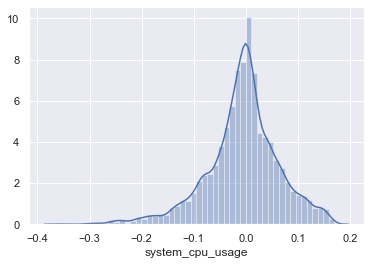

In [491]:
# I am using opion 2: consider the lower 99 percentile of the pods values
if 1 == 1:  
    q = raw_data['system_cpu_usage'].quantile(0.96)
    raw_data = raw_data[raw_data['system_cpu_usage'] < q]
    sns.distplot(raw_data['system_cpu_usage'])  

In [492]:
raw_data.describe() 

,service_cpu_use,service_memory_use,service_cpu_sat,service_net_usage,service_disk_usage,service_req_total,service_errors,service_request_size,service_response_size,containers_count,system_cpu_usage,service_ltcy_200,time
count,"8,994.000","8,994.000","8,994.000","8,994.000","8,994.000","8,994.000","8,994.000","8,994.000","8,994.000","8,994.000","8,994.000","8,994.000","8,994.000"
mean,0.487,0.106,0.726,inf,1.172,-0.188,0.048,0.022,0.069,0.128,-0.006,-0.037,"37,845.244"
std,10.142,0.603,4.245,nan,3.899,0.285,0.493,0.311,1.207,0.085,0.070,0.189,"26,477.727"
min,-0.972,-0.913,-1.000,-0.999,-1.000,-1.000,-1.000,-1.000,-1.000,0.016,-0.359,-1.000,9.000
25%,-0.367,-0.291,-0.470,-0.273,-0.748,-0.491,0.000,-0.097,-0.122,0.065,-0.039,-0.125,"12,014.250"
50%,-0.015,-0.022,-0.011,0.002,-0.135,0.000,0.000,0.001,0.000,0.100,-0.001,0.000,"41,353.500"
75%,0.552,0.339,0.768,0.388,1.214,0.004,0.000,0.094,0.090,0.184,0.034,0.055,"62,880.500"
max,914.542,8.063,274.594,inf,30.692,0.006,5.508,4.661,44.116,0.368,0.170,0.346,"86,333.000"


# service_response_size and service_request_size

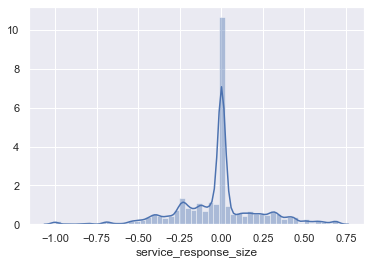

In [493]:
if 1 == 1:  
    q = raw_data['service_response_size'].quantile(0.96)
    raw_data = raw_data[raw_data['service_response_size'] < q]
    sns.distplot(raw_data['service_response_size'])  

In [494]:
raw_data.describe() 

,service_cpu_use,service_memory_use,service_cpu_sat,service_net_usage,service_disk_usage,service_req_total,service_errors,service_request_size,service_response_size,containers_count,system_cpu_usage,service_ltcy_200,time
count,"8,633.000","8,633.000","8,633.000","8,633.000","8,633.000","8,633.000","8,633.000","8,633.000","8,633.000","8,633.000","8,633.000","8,633.000","8,633.000"
mean,0.498,0.107,0.720,inf,1.177,-0.186,0.050,0.019,-0.018,0.128,-0.006,-0.039,"37,644.214"
std,10.350,0.609,4.300,nan,3.894,0.286,0.500,0.309,0.248,0.085,0.069,0.188,"26,224.154"
min,-0.972,-0.913,-1.000,-0.999,-1.000,-1.000,-1.000,-1.000,-1.000,0.016,-0.359,-1.000,9.000
25%,-0.368,-0.293,-0.470,-0.271,-0.748,-0.489,0.000,-0.098,-0.132,0.065,-0.038,-0.126,"12,377.000"
50%,-0.015,-0.024,-0.013,0.002,-0.135,0.000,0.000,0.000,0.000,0.100,-0.001,0.000,"41,315.000"
75%,0.557,0.341,0.757,0.383,1.231,0.004,0.000,0.090,0.036,0.184,0.033,0.044,"62,393.000"
max,914.542,8.063,274.594,inf,30.692,0.006,5.508,4.661,0.700,0.368,0.170,0.346,"86,245.000"


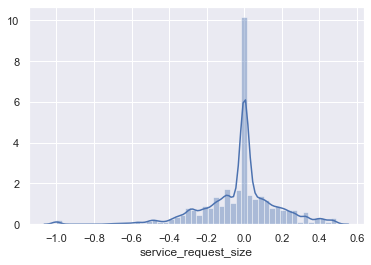

In [495]:
if 1 == 1:  
    q = raw_data['service_request_size'].quantile(0.96)
    raw_data = raw_data[raw_data['service_request_size'] < q]
    sns.distplot(raw_data['service_request_size']) 


In [496]:
raw_data.describe() 

,service_cpu_use,service_memory_use,service_cpu_sat,service_net_usage,service_disk_usage,service_req_total,service_errors,service_request_size,service_response_size,containers_count,system_cpu_usage,service_ltcy_200,time
count,"8,285.000","8,285.000","8,285.000","8,285.000","8,285.000","8,285.000","8,285.000","8,285.000","8,285.000","8,285.000","8,285.000","8,285.000","8,285.000"
mean,0.500,0.105,0.708,inf,1.156,-0.179,0.049,-0.020,-0.020,0.128,-0.007,-0.043,"36,910.242"
std,10.559,0.606,4.353,nan,3.850,0.281,0.506,0.200,0.248,0.085,0.069,0.187,"26,046.887"
min,-0.972,-0.913,-1.000,-0.999,-1.000,-1.000,-1.000,-1.000,-1.000,0.016,-0.359,-1.000,9.000
25%,-0.368,-0.292,-0.473,-0.263,-0.747,-0.487,0.000,-0.104,-0.130,0.065,-0.038,-0.128,"12,205.000"
50%,-0.016,-0.026,-0.021,0.002,-0.137,0.000,0.000,0.000,0.000,0.100,-0.001,0.000,"40,699.000"
75%,0.553,0.337,0.736,0.374,1.217,0.004,0.000,0.063,0.033,0.184,0.032,0.030,"60,377.000"
max,914.542,8.063,274.594,inf,30.692,0.006,5.508,0.490,0.700,0.368,0.170,0.346,"86,245.000"


In [497]:
# drop service_net_usage
raw_data = raw_data.drop('service_net_usage', 1)
raw_data = raw_data.drop('service_cpu_sat', 1)
raw_data = raw_data.drop('time', 1)

raw_data.describe()

,service_cpu_use,service_memory_use,service_disk_usage,service_req_total,service_errors,service_request_size,service_response_size,containers_count,system_cpu_usage,service_ltcy_200
count,"8,285.000","8,285.000","8,285.000","8,285.000","8,285.000","8,285.000","8,285.000","8,285.000","8,285.000","8,285.000"
mean,0.500,0.105,1.156,-0.179,0.049,-0.020,-0.020,0.128,-0.007,-0.043
std,10.559,0.606,3.850,0.281,0.506,0.200,0.248,0.085,0.069,0.187
min,-0.972,-0.913,-1.000,-1.000,-1.000,-1.000,-1.000,0.016,-0.359,-1.000
25%,-0.368,-0.292,-0.747,-0.487,0.000,-0.104,-0.130,0.065,-0.038,-0.128
50%,-0.016,-0.026,-0.137,0.000,0.000,0.000,0.000,0.100,-0.001,0.000
75%,0.553,0.337,1.217,0.004,0.000,0.063,0.033,0.184,0.032,0.030
max,914.542,8.063,30.692,0.006,5.508,0.490,0.700,0.368,0.170,0.346


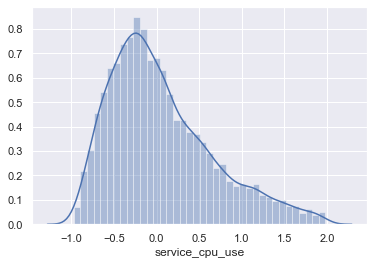

In [498]:
# service_cpu_use
if 1 == 1:  
    q = raw_data['service_cpu_use'].quantile(0.93)
    raw_data = raw_data[raw_data['service_cpu_use'] < q]
    sns.distplot(raw_data['service_cpu_use'])

In [499]:
raw_data.describe()

,service_cpu_use,service_memory_use,service_disk_usage,service_req_total,service_errors,service_request_size,service_response_size,containers_count,system_cpu_usage,service_ltcy_200
count,"7,705.000","7,705.000","7,705.000","7,705.000","7,705.000","7,705.000","7,705.000","7,705.000","7,705.000","7,705.000"
mean,0.054,0.062,1.181,-0.180,0.050,-0.019,-0.021,0.127,-0.007,-0.043
std,0.607,0.551,3.866,0.281,0.510,0.200,0.249,0.085,0.070,0.187
min,-0.972,-0.913,-1.000,-1.000,-1.000,-1.000,-1.000,0.016,-0.359,-1.000
25%,-0.391,-0.304,-0.739,-0.488,0.000,-0.103,-0.132,0.064,-0.039,-0.129
50%,-0.074,-0.048,-0.121,0.000,0.000,0.000,0.000,0.100,-0.002,0.000
75%,0.395,0.294,1.254,0.004,0.000,0.072,0.033,0.184,0.032,0.031
max,1.982,6.739,30.692,0.006,5.508,0.490,0.700,0.368,0.170,0.346


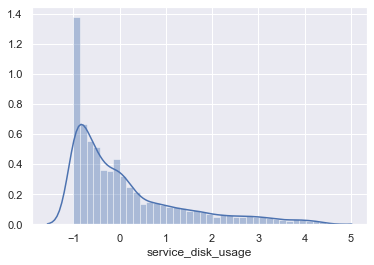

In [500]:
# service_disk_usage
if 1 == 1:  
    q = raw_data['service_disk_usage'].quantile(0.90)
    raw_data = raw_data[raw_data['service_disk_usage'] < q]
    sns.distplot(raw_data['service_disk_usage'])

In [501]:
raw_data.describe()

,service_cpu_use,service_memory_use,service_disk_usage,service_req_total,service_errors,service_request_size,service_response_size,containers_count,system_cpu_usage,service_ltcy_200
count,"6,934.000","6,934.000","6,934.000","6,934.000","6,934.000","6,934.000","6,934.000","6,934.000","6,934.000","6,934.000"
mean,0.052,0.057,0.135,-0.180,0.050,-0.017,-0.020,0.127,-0.006,-0.042
std,0.603,0.539,1.221,0.282,0.508,0.198,0.249,0.084,0.069,0.186
min,-0.972,-0.913,-1.000,-1.000,-1.000,-1.000,-1.000,0.016,-0.359,-1.000
25%,-0.389,-0.305,-0.775,-0.488,0.000,-0.099,-0.132,0.064,-0.038,-0.128
50%,-0.073,-0.048,-0.281,0.000,0.000,0.000,0.000,0.100,-0.002,0.000
75%,0.382,0.290,0.616,0.004,0.000,0.069,0.031,0.182,0.032,0.030
max,1.982,6.739,4.463,0.006,5.508,0.490,0.700,0.368,0.170,0.346


In [502]:
# add sequence feature
raw_data['sequence'] = [i for i in range(0,xlen)]

In [503]:
raw_data.head(3)

,service_cpu_use,service_memory_use,service_disk_usage,service_req_total,service_errors,service_request_size,service_response_size,containers_count,system_cpu_usage,service_ltcy_200,sequence
date,,,,,,,,,,,
2020-02-27 22:51:50,0.804,0.379,0.748,-0.983,-0.036,-0.275,-0.068,0.259,-0.100,-0.114,0
2020-02-27 22:51:51,0.898,0.357,-0.537,-0.983,-0.036,-0.275,-0.068,0.259,-0.100,-0.114,1
2020-02-27 22:51:52,0.428,0.546,-0.537,-0.983,-0.036,-0.275,-0.068,0.259,-0.100,-0.114,2


In [504]:
raw_data.shape

(6934, 11)

## Save Dataset to a file

In [505]:
if 1 == 1:
    cleaned_file_path = file_dir + 'no_missing_outliers_dataset.csv'
    raw_data.to_csv(path_or_buf=cleaned_file_path, index=True)